Model Training
1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Importing the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('C:/Users/user/ML_Projects/notebook/data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding the Average Score

In [4]:
df['average_score'] = (df.math_score + df.reading_score + df.writing_score)/3

In [5]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


Preparing X and Y variables

In [6]:
X = df.drop(columns=['average_score'], axis=1)

In [7]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [8]:
y = df['average_score']

In [9]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

In [10]:
# Create Columns Tranformer with 3 different types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 20)

In [13]:
# Separating dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((800, 20), (200, 20))

In [14]:
y_train.shape, y_test.shape

((800,), (200,))

Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse, r2_square

In [16]:
models = {
    'Linear regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbor Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    #'CatBoosting regressor': CatBoostRegressor(verbose=False)
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train models

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Root mean Square Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2Score: {:.4f}'.format(model_train_r2))


    print('Modle Performnace for Test set')
    print('- Root mean Square Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear regression
Model performance for Training set
- Root mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- R2Score: 1.0000
Modle Performnace for Test set
- Root mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- R2Score: 1.0000


Lasso
Model performance for Training set
- Root mean Square Error: 1.0645
- Mean Absolute Error: 0.8506
- R2Score: 0.9943
Modle Performnace for Test set
- Root mean Square Error: 1.1142
- Mean Absolute Error: 0.8769
- R2Score: 0.9942


Ridge
Model performance for Training set
- Root mean Square Error: 0.0080
- Mean Absolute Error: 0.0065
- R2Score: 1.0000
Modle Performnace for Test set
- Root mean Square Error: 0.0088
- Mean Absolute Error: 0.0067
- R2Score: 1.0000


K-Neighbor Regressor
Model performance for Training set
- Root mean Square Error: 2.2573
- Mean Absolute Error: 1.7680
- R2Score: 0.9745
Modle Performnace for Test set
- Root mean Square Error: 3.0706
- Mean Absolute Error: 2.2833
- R2Score: 0.9560


Decision Tree
Model performan

RESULTS

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

,Model Name,R2_Score
0,Linear regression,1.000000
1,Lasso,0.994209
2,Ridge,1.000000
3,K-Neighbor Regressor,0.956016
4,Decision Tree,0.987021
5,Random Forest Regressor,0.994119
6,XGB Regressor,0.994748
7,AdaBoost Regressor,0.977742


LINEAR REGRESSION

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 100.00


Plot y_pred and y_test

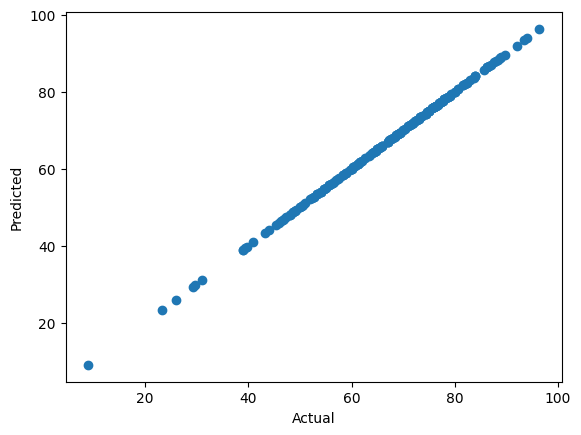

In [19]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

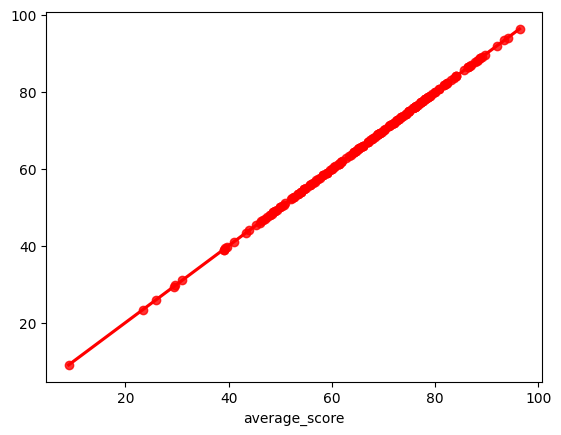

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actaul values':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actaul values,Predicted Value,Difference
521,87.000000,87.000000,-2.842171e-14
737,64.000000,64.000000,1.421085e-14
740,75.000000,75.000000,0.000000e+00
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,0.000000e+00
...,...,...,...
408,55.000000,55.000000,1.421085e-14
332,57.000000,57.000000,1.421085e-14
208,77.000000,77.000000,0.000000e+00
613,72.000000,72.000000,0.000000e+00
